# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [18]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install pip --upgrade
!pip install smdebug
!pip install sagemaker


yes: standard output: Broken pipe


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import os
import boto3
import sagemaker
import json
import zipfile

import pandas as pd
import numpy as np

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [2]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data

# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

# !unzip dogImages.zip

--2023-01-17 09:12:59--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.194.56
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.194.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  26.8MB/s    in 33s     

2023-01-17 09:13:33 (32.3 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

In [7]:
import boto3
import os
import shutil
import zipfile

s3 = boto3.client('s3')

# Set the name of the S3 bucket and the directory you want to upload
bucket_name = 'aws-dog-bucket'
prefix = 'datadogImages'

# Upload the zip file to S3
# s3.upload_file('dogImages.zip', bucket_name, 'dogImages.zip')

# Cleanup
# os.remove('dogImages.zip')



In [ ]:


# Set the name of the S3 bucket, the key of the zip file, and the prefix for the unzipped files
zip_key = 'dogImages.zip'
unzip_prefix = 'data'

# Download the zip file from S3
# s3.download_file(bucket_name, zip_key, 'dogImages.zip')

# Unzip the file
# with zipfile.ZipFile('dogImages.zip', 'r') as zip_ref:
    # zip_ref.extractall('dogImages')

# Upload the unzipped files to S3
# for root, dirs, files in os.walk('dogImages'):
    # for filename in files:
    #     local_path = os.path.join(root, filename)
    #     s3_path = unzip_prefix + os.path.relpath(local_path, 'dogImages')
    #     s3.upload_file(local_path, bucket_name, s3_path)

# Cleanup
# os.remove('dogImages.zip')
# shutil.rmtree('dogImages')


In [4]:
dog_classes = [name.split('.') for name in os.listdir("dogImages/train")]
dog_classes = dict(dog_classes)
dog_classes

{'114': 'Otterhound',
 '110': 'Norwegian_lundehund',
 '127': 'Silky_terrier',
 '091': 'Japanese_chin',
 '095': 'Kuvasz',
 '061': 'English_cocker_spaniel',
 '043': 'Canaan_dog',
 '131': 'Wirehaired_pointing_griffon',
 '124': 'Poodle',
 '087': 'Irish_terrier',
 '053': 'Cocker_spaniel',
 '064': 'English_toy_spaniel',
 '105': 'Neapolitan_mastiff',
 '032': 'Boston_terrier',
 '017': 'Bearded_collie',
 '094': 'Komondor',
 '003': 'Airedale_terrier',
 '084': 'Icelandic_sheepdog',
 '122': 'Pointer',
 '098': 'Leonberger',
 '125': 'Portuguese_water_dog',
 '009': 'American_water_spaniel',
 '058': 'Dandie_dinmont_terrier',
 '115': 'Papillon',
 '006': 'American_eskimo_dog',
 '041': 'Bullmastiff',
 '085': 'Irish_red_and_white_setter',
 '081': 'Greyhound',
 '004': 'Akita',
 '103': 'Mastiff',
 '044': 'Cane_corso',
 '118': 'Pembroke_welsh_corgi',
 '013': 'Australian_terrier',
 '117': 'Pekingese',
 '002': 'Afghan_hound',
 '025': 'Black_and_tan_coonhound',
 '129': 'Tibetan_mastiff',
 '093': 'Kerry_blue_ter

## Preprocessing and Loading the Data

The data is stored in a 3-level directory. The first level splits the data into 3 folders which contain the train, test, and validation images. Each of these folder are split into dog breeds which contain several images of the same breed.

In this case, the folder names will need to be extracted to have a list of classes to be used for the training. The label for each image can be defined by its location and filename. 

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import helper

INFO:matplotlib.font_manager:Generating new fontManager, this may take some time...


In [3]:
train_dir = './dogImages/train'
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
traindata = datasets.ImageFolder(train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=32, shuffle=True)

test_dir = './dogImages/test'
testdata = datasets.ImageFolder(test_dir, transform=transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size=32, shuffle=True)


<AxesSubplot:>

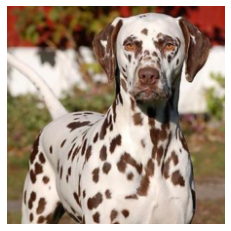

In [7]:
images, labels = next(iter(trainloader))
helper.imshow(images[0], normalize=False)

<AxesSubplot:>

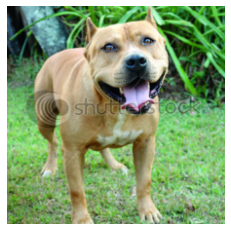

In [8]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [2]:
import pandas as pd
import numpy as np

import sagemaker
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
from sagemaker.debugger import (
    Rule,
    ProfilerRule,
    rule_configs,
    DebuggerHookConfig,
    ProfilerConfig,
    FrameworkProfile,
    CollectionConfig
)

In [3]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
        "lr" : ContinuousParameter(0.001,0.1),
        "batch-size" : CategoricalParameter([32,64,128,256,512])
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [5]:
import hpo

#TODO: Create estimators for your HPs

# TODO: Your estimator here

estimator = PyTorch(
    entry_point="hpo.py", 
    role=get_execution_role(),
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)


# TODO: Your HP tuner here
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=9,
    max_parallel_jobs=3,
    objective_type=objective_type,
)


[2023-01-21 20:17:15.384 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:32 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-01-21 20:17:15.803 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:32 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


In [8]:
# TODO: Fit your HP Tuner
# TODO: Remember to include your data channels
tuner.fit({"training" : "s3://{}/{}".format(bucket_name, prefix) + "/train", 
        "testing": "s3://{}/{}".format(bucket_name, prefix) + "/test",
        "validation" : "s3://{}/{}".format(bucket_name, prefix) + "/valid"}) 

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating hyperparameter tuning job with name: pytorch-training-230121-2023


................................................................*


UnexpectedStatusException: Error for HyperParameterTuning job pytorch-training-230121-2023: Failed. Reason: No training job succeeded after 5 attempts. For additional details, please take a look at the training job failures by listing training jobs for the hyperparameter tuning job.

In [ ]:
# TODO: Get the best estimators and the best HPs

best_estimator = #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [ ]:
# TODO: Create and fit an estimator

estimator = # TODO: Your estimator here

In [ ]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

## Model Deploying

In [ ]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances

In [ ]:
# TODO: Run an prediction on the endpoint

image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()